# Using Data Science to Understand What Makes Wine Taste Good

## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [29]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [30]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [31]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Examine the features in the data-set and their data types

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [33]:
# Some more additional data analysis
display(np.round(data.describe()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


# Section 2: Exploring Relationships between features

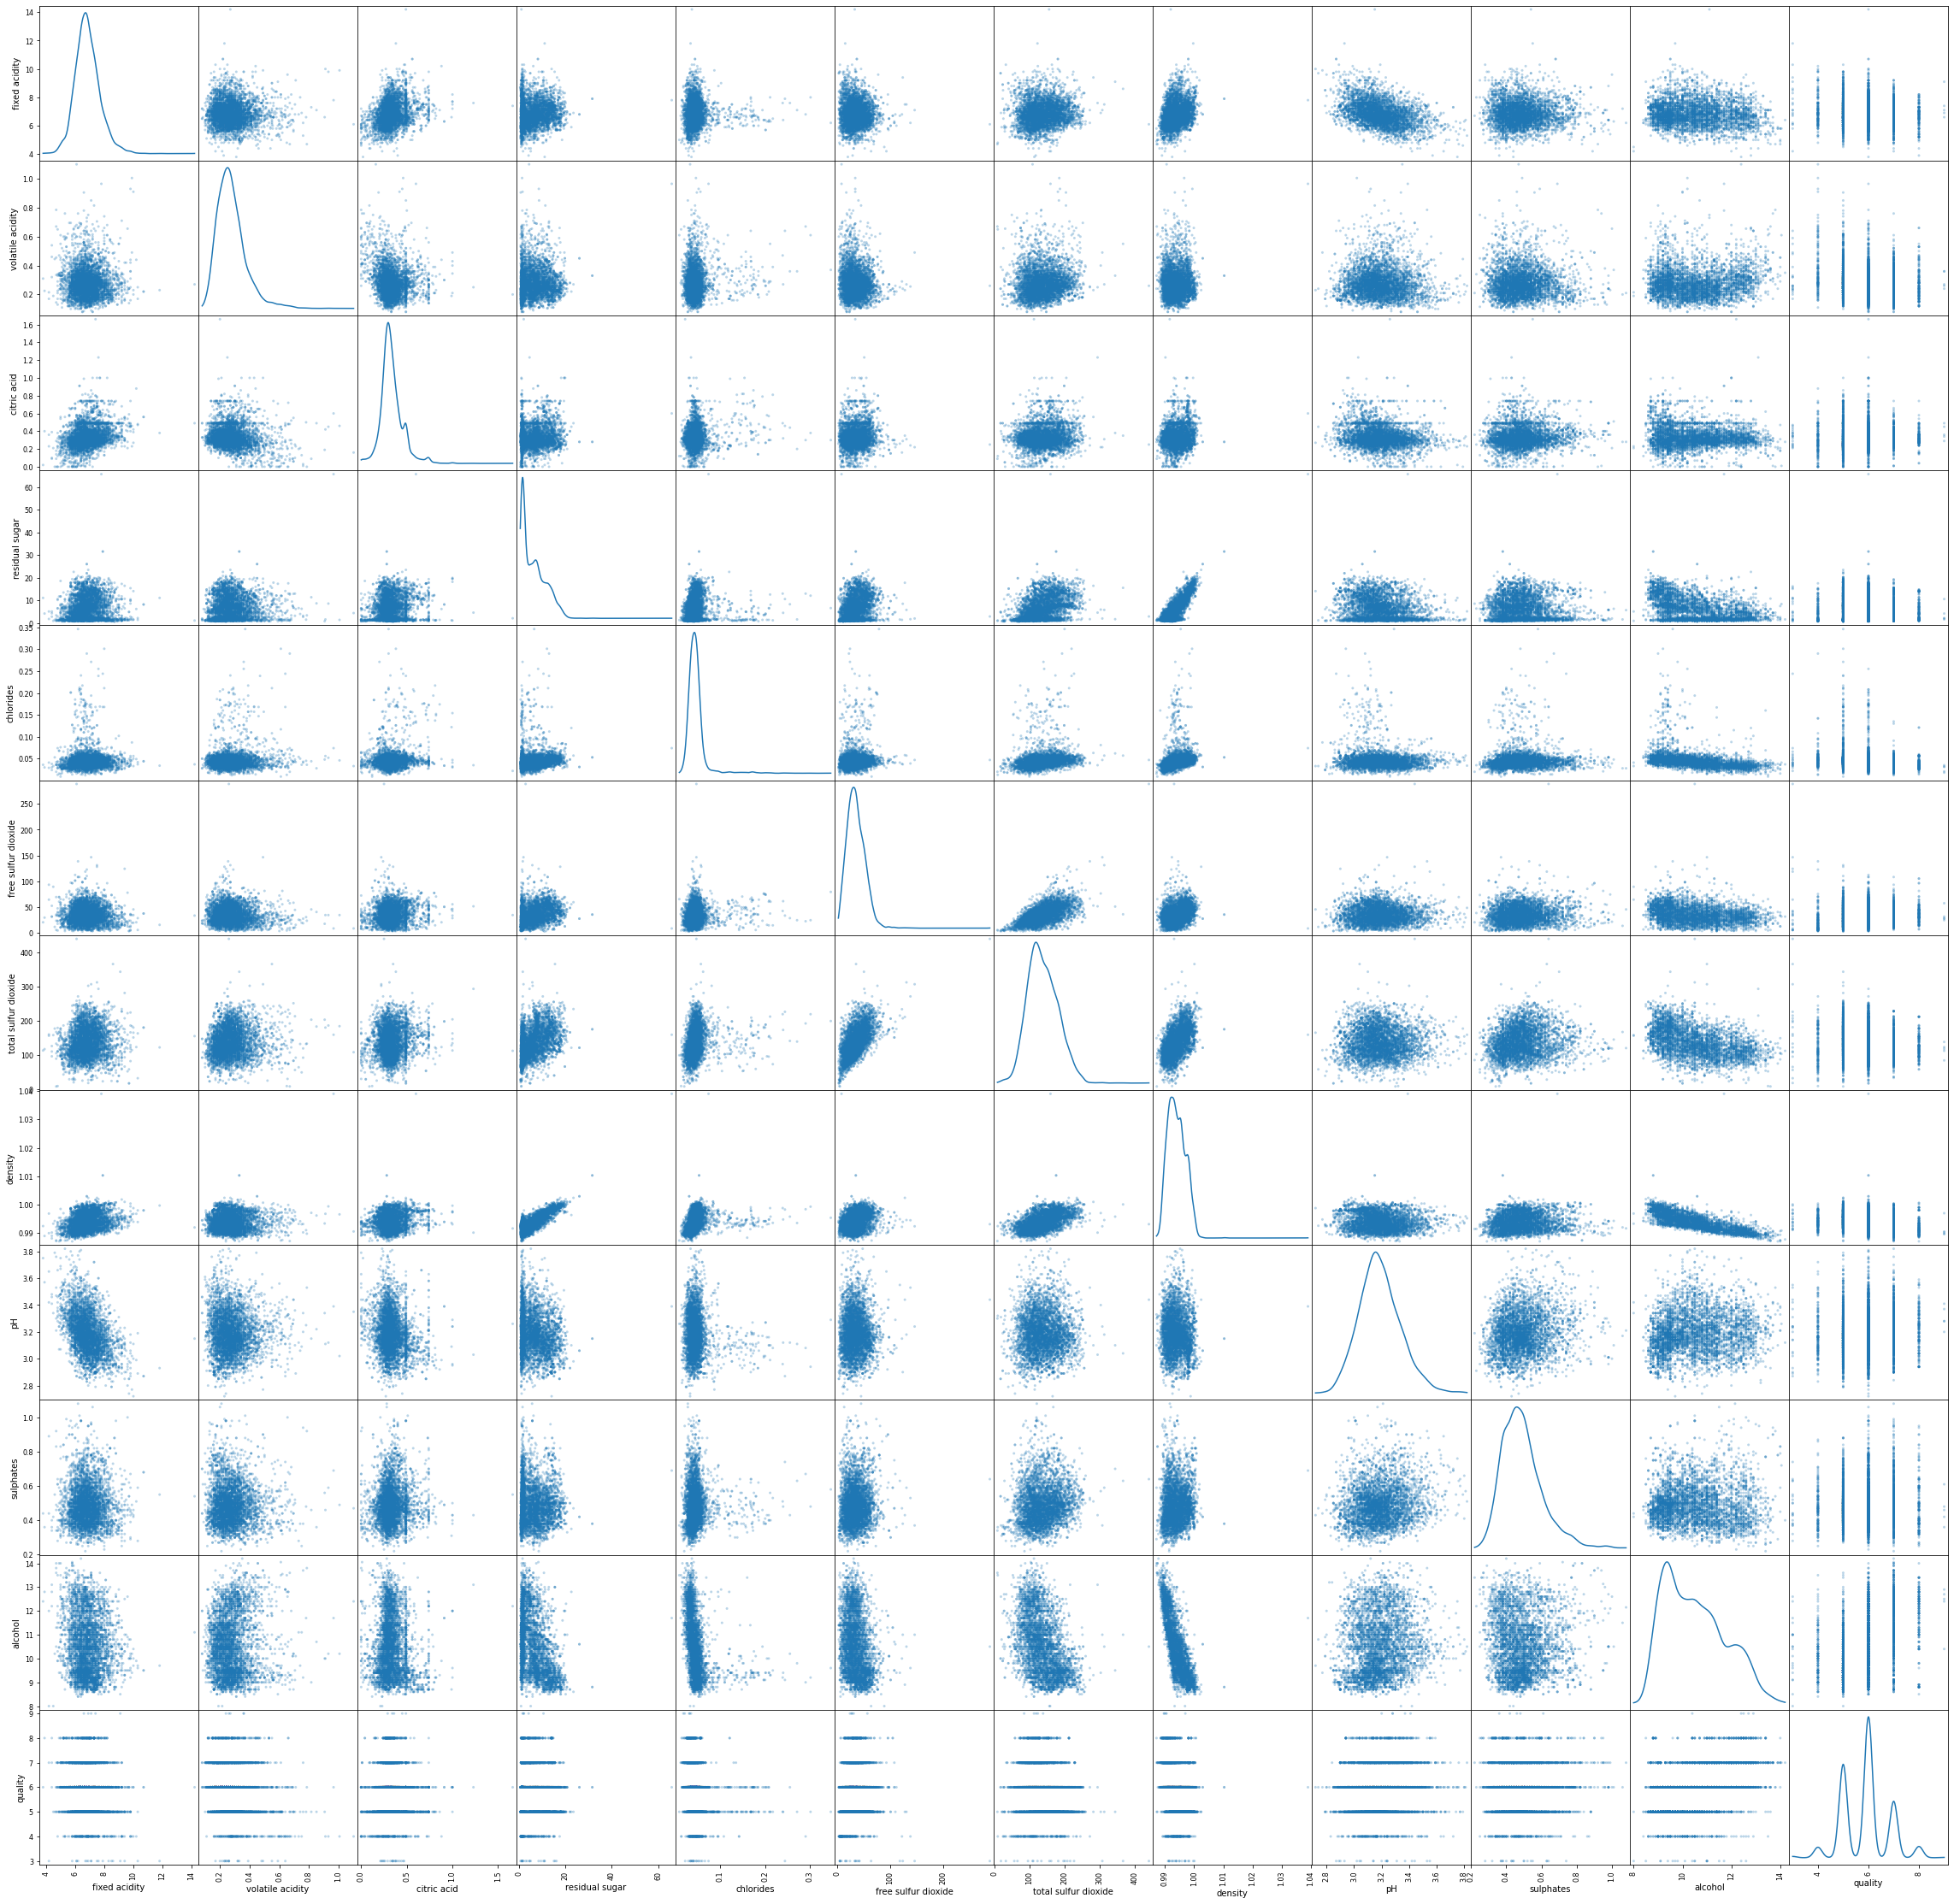

In [34]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

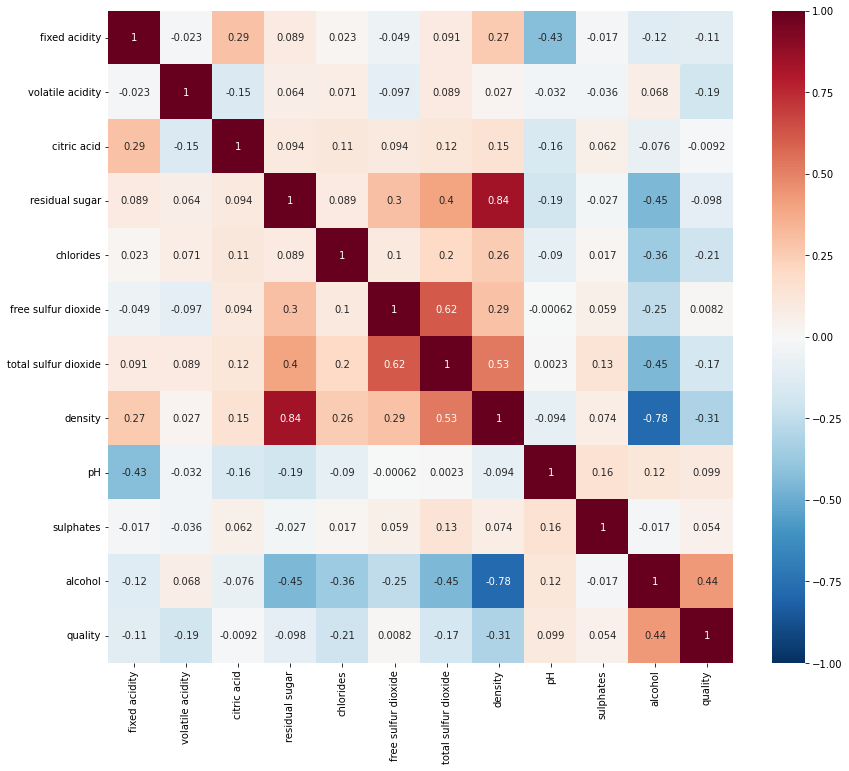

In [35]:
correlation = data.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


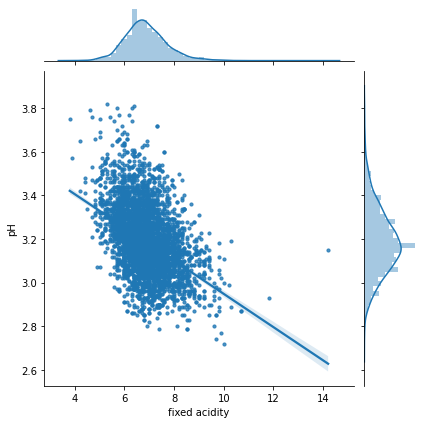

In [36]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


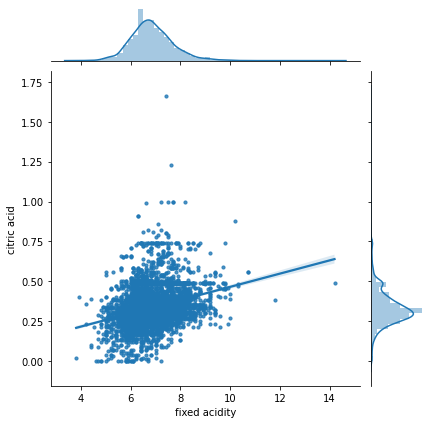

In [37]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


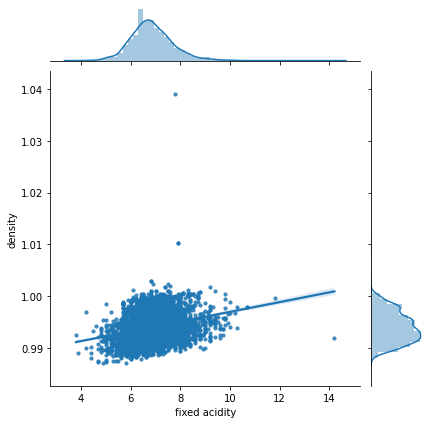

In [38]:
fixedAcidity_density = data[['density', 'fixed acidity']]
gridB = sns.JointGrid(x="fixed acidity", y="density", data=fixedAcidity_density, height=6)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridB = gridB.plot_marginals(sns.distplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


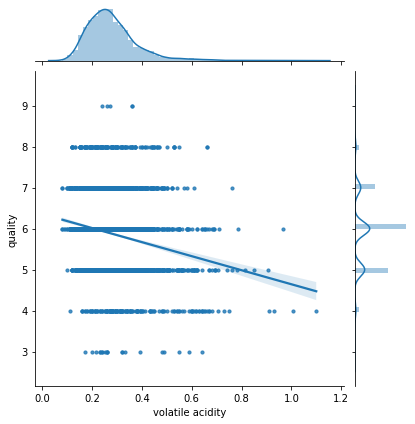

In [39]:
volatileAcidity_quality = data[['quality', 'volatile acidity']]
g = sns.JointGrid(x="volatile acidity", y="quality", data=volatileAcidity_quality, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

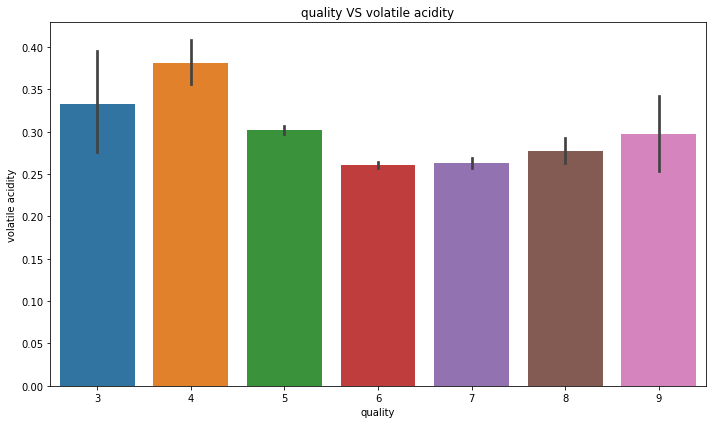

<Figure size 432x288 with 0 Axes>

In [40]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


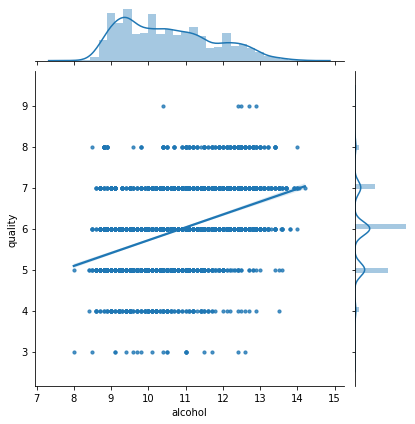

In [41]:
quality_alcohol = data[['alcohol', 'quality']]

g = sns.JointGrid(x="alcohol", y="quality", data=quality_alcohol, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

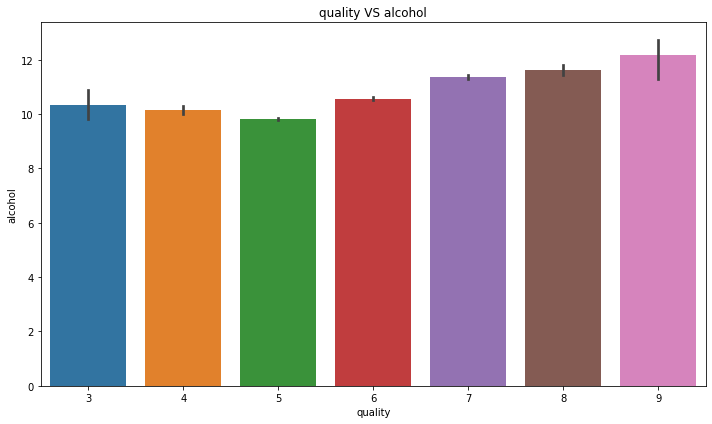

<Figure size 432x288 with 0 Axes>

In [42]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [43]:
# TODO: Select any two features of your choice and view their relationship
# featureA = 'pH'
# featureB = 'alcohol'
# featureA_featureB = data[[featureA, featureB]]

# g = sns.JointGrid(x=featureA, y=featureB, data=featureA_featureB, size=6)
# g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
# g = g.plot_marginals(sns.distplot)

# fig, axs = plt.subplots(ncols=1,figsize=(10,6))
# sns.barplot(x=featureA, y=featureB, data=featureA_featureB, ax=axs)
# plt.title('quality VS alcohol')

# plt.tight_layout()
# plt.show()
# plt.gcf().clear()

## Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [44]:
# For each feature find the data points with extreme high or low values
mios = pd.Series([False])
mios = mios.repeat(data.shape[0]).reset_index(drop=True)

for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    mios = mios | aux
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
outliers = mios
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4.7,0.335,0.14,1.30,0.036,69.0,168.0,0.99212,3.47,0.46,10.5,5
4786,4.4,0.320,0.39,4.30,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.20,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.8,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
79,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4860,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.0,6
4867,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,6
4877,5.9,0.540,0.00,0.8,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
62,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.5,5
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,7.3,0.35,0.67,8.30,0.053,10.0,100.0,0.99590,3.19,0.50,10.9,5
4815,6.2,0.76,0.01,3.20,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7
4847,4.4,0.54,0.09,5.10,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.80,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4836,6.7,0.50,0.36,11.5,0.096,18.0,92.0,0.99642,3.11,0.49,9.60,5
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.50,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4567,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4601,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6
4744,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.800000,6
4815,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.700000,7
4818,6.0,0.270,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333,6
4886,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


# Part 2: Using Machine Learning to Predict the Quality of Wines

In [45]:
#Displays the first 2 columns
display(data.head(n=5))


# Split the data into features and target label
quality_raw = data['quality']
features_raw = data.drop(['quality'], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Next, shuffle and split our data-set into training and testing subsets:

In [46]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3918 samples.
Testing set has 980 samples.


### Implementation: Initial Model Evaluation


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [48]:
# prueba standard de modelos


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
print("Linear RMSE: {}".format(rmse))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_pred_ridge, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")


    

Linear RMSE: 0.6598453517957841
R2 Linear: 0.25134767611013764

Lasso RMSE: 0.8566989697343049
R2 Lasso: 0.028000011184232676

Ridge RMSE: 0.6628590137765162
R2 Ridge: 0.24792841273402477



In [54]:
# Prueba normalizando datos, suele ser de ayuda en metodos numericos

data2 = data
quality_raw = data2['quality']
features_raw = data2.drop(['quality'], axis = 1)
from sklearn.preprocessing import Normalizer, MinMaxScaler
transformer = Normalizer().fit(features_raw)
f_proc = transformer.transform(features_raw)

X_train, X_test, y_train, y_test = train_test_split(f_proc, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
print("Linear RMSE: {}".format(rmse))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_pred_ridge, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

Linear RMSE: 0.6547636246770339
R2 Linear: 0.25711334045326384

Lasso RMSE: 0.8863630663881632
R2 Lasso: -0.005656503687872849

Ridge RMSE: 0.8194401712974174
R2 Ridge: 0.07027338017774898



In [56]:
# prueba con escalado

data2 = data
quality_raw = data2['quality']
features_raw = data2.drop(['quality'], axis = 1)
from sklearn.preprocessing import Normalizer, MinMaxScaler
transformer = MinMaxScaler().fit(features_raw)
f_proc = transformer.transform(features_raw)

X_train, X_test, y_train, y_test = train_test_split(f_proc, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
print("Linear RMSE: {}".format(rmse))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_pred_ridge, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

Linear RMSE: 0.6598453517957825
R2 Linear: 0.25134767611013953

Lasso RMSE: 0.8863630663881632
R2 Lasso: -0.005656503687872849

Ridge RMSE: 0.6584820403349799
R2 Ridge: 0.2528944723261586



In [57]:
# prueba con conjunto de datos sin outliers

quality_raw = good_data['quality']
features_raw = good_data.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("")


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
print("Linear RMSE: {}".format(rmse))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_pred_ridge, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")


Training set has 3083 samples.
Testing set has 771 samples.

Linear RMSE: 0.4360100990216294
R2 Linear: 0.23649103795854487

Lasso RMSE: 0.5501788865908016
R2 Lasso: 0.03656701626714409

Ridge RMSE: 0.4477771214853202
Accuracy Ridge: 0.21588548976658584
R2 Ridge: 0.21588548976658584



In [58]:
# conjunto de datos sin outliers y escalado
data2 = good_data
quality_raw = data2['quality']
features_raw = data2.drop(['quality'], axis = 1)
from sklearn.preprocessing import Normalizer, MinMaxScaler
transformer = MinMaxScaler().fit(features_raw)
f_proc = transformer.transform(features_raw)

X_train, X_test, y_train, y_test = train_test_split(f_proc, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test)
print("Linear RMSE: {}".format(rmse))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_pred_ridge, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

Linear RMSE: 0.4360100990216307
R2 Linear: 0.23649103795854265

Lasso RMSE: 0.5710673980066452
R2 Lasso: -1.1415529479696929e-05

Ridge RMSE: 0.43781541629529147
R2 Ridge: 0.23332969852887986

